In [2]:
 # pip install langchain langgraph langsmith langchain_groq langchain_community

In [ ]:
groq_api_key ="your_groq_api_key"

In [4]:
from langchain_groq import ChatGroq

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="llama-3.1-8b-instant")

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END

In [7]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder = StateGraph(State)


In [8]:
graph_builder

In [9]:
def chatbot(state:State):
    return{"messages":llm.invoke(state['messages'])}

In [10]:
# add node
graph_builder.add_node('chatbot',chatbot)

In [11]:
graph_builder

In [12]:
graph_builder.add_edge(START,'chatbot')
graph_builder.add_edge('chatbot',END)

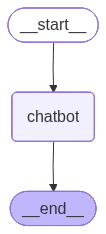

In [13]:
graph_builder.compile()

In [14]:
graph = graph_builder.compile()

In [ ]:
while True:
    user_input=input("user:")
    if user_input.lower() in ['quit','q']:
        print('Good Bye, thank you using LangGrpah Framework')
        break 
    for event in graph.stream({'messages':('user', user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print('Assistant:',value['messages'].content)

dict_values([{'messages': AIMessage(content='A database is a collection of organized data that is stored in a way that allows for efficient retrieval and manipulation of the data. It is a central repository for storing and managing data, typically in a structured format. Databases are designed to store and manage data in a way that makes it easy to access, update, and analyze.\n\nA database typically consists of the following components:\n\n1. **Data**: The actual information stored in the database, such as customer names, addresses, phone numbers, etc.\n2. **Schema**: The structure of the data, including the relationships between different pieces of data.\n3. **Storage**: The physical storage of the data, which can be on a hard drive, solid-state drive, or other storage medium.\n4. **Database management system (DBMS)**: A software system that enables the creation, maintenance, and manipulation of the database.\n\nTypes of databases:\n\n1. **Relational databases**: Store data in tables